In [5]:
import numpy as np
from scipy.ndimage import distance_transform_edt, label

def get_african_upwelling_zone(sea_surface: np.ndarray,
                               n_pixels: int = 10) -> np.ndarray:
    """
    Gets the upwelling zone of width n_pixels *only* along
    the African coast, excluding islands.

    Parameters
    ----------
    sea_surface : np.ndarray, bool
    Mask where True = sea, False = land.
    n_pixels : int
    Width of the coastal zone in pixels (default 10).

    Returns
    -------
    np.ndarray, bool
    Mask of the upwelling zone: True = sea pixels within
    n_pixels of the African coast.
    """
    sea = sea_surface.astype(bool)
    land = ~sea

    labeled_land, n_components = label(land)

    sizes = np.bincount(labeled_land.ravel())
    sizes[0] = 0
    main_label = sizes.argmax()

    africa_mask = (labeled_land == main_label)

    dist_mask = ~africa_mask

    dist = distance_transform_edt(dist_mask)

    upwelling_zone = sea & (dist <= n_pixels)

    return upwelling_zone

sea_mask = np.load("D:/ULPGC/4Curso/TFG/seacast_code/Proyecto_TFG/Seacast/data/atlantic/static/sea_mask.npy")
sea_mask = sea_mask[0]
coastal_line = get_african_upwelling_zone(sea_surface=sea_mask, n_pixels=1)

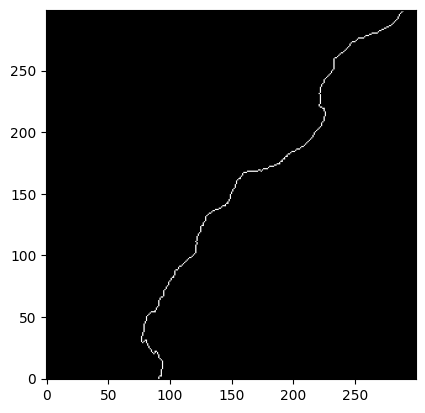

In [6]:
import matplotlib.pyplot as plt
plt.imshow(coastal_line, cmap="gray", origin="lower")